In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy as sp
import scipy.signal as sig
from scipy import io
from scipy.fftpack import fft, ifft, fftfreq

# Estimadores

## Autocorrelación y PSD

### Ruido Blanco

Media y varianza inses 2.7462794890818985 6.674879988637478
Media y varianza ses 1.0220705500505007 1.1465372166001062


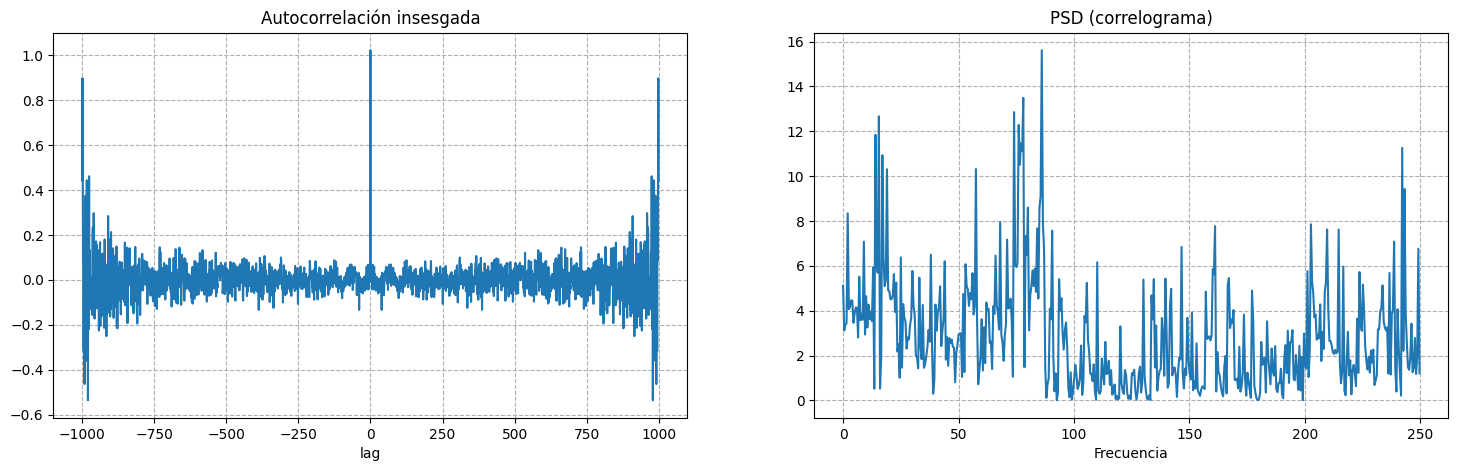

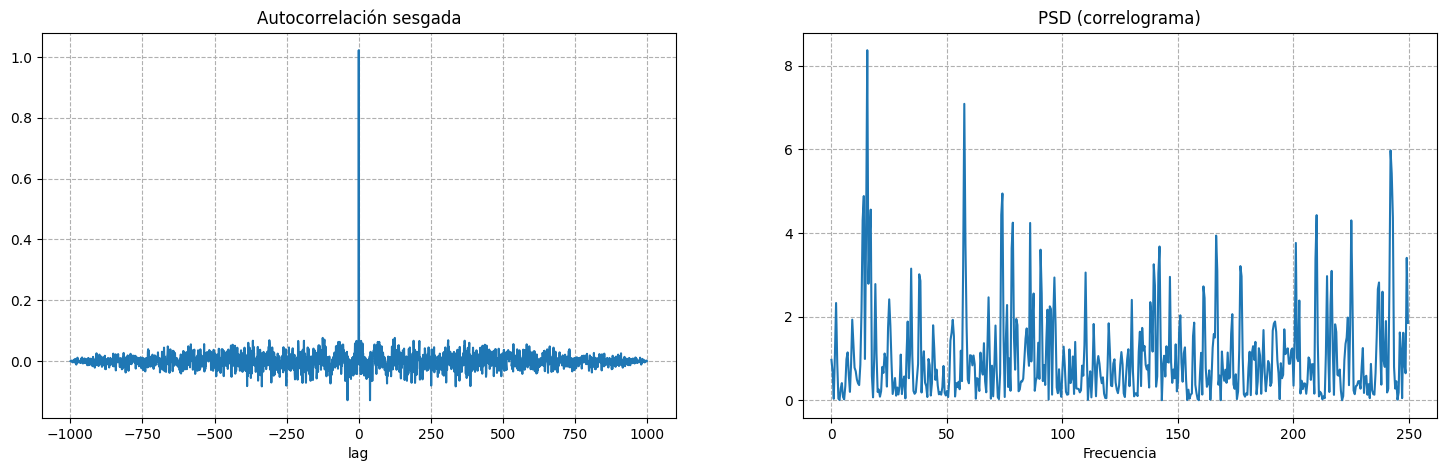

In [ ]:
# Estudio de autocorrelación como estimador

mean = 0
std = 1
num_noise = 1000

noise = np.random.normal(mean, std, size=num_noise) #señal de ruido
l=np.arange(-len(noise)+1,len(noise)) #lag
rnn=np.convolve(noise,noise[::-1])
N=len(noise)
Rnn1=np.ndarray(shape=(len(l),), dtype=float)
for i in l:
  Rnn1[i]=rnn[i]/(N-np.abs(l[i])) # Autocorrelción insesgada

Snn1=fft(Rnn1)         # TF autocorrelcación
w1=fftfreq(len(Snn1))*N
# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(l,Rnn1)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación insesgada")
ax1.set_xlabel("lag")
ax2.plot(w1[0:500],np.abs(Snn1[0:500]))
ax2.grid(linestyle='--')
ax2.set_title("PSD (correlograma)")
ax2.set_xlabel("Frecuencia")
print('Media y varianza inses', np.mean(np.abs(Snn1)), np.var(np.abs(Snn1)))
Rnn2=rnn/(N)  #Autocorrelcación sesgada
Snn2=fft(Rnn2) #TF autocorrelación
w2=fftfreq(len(Snn2))*N
# Gráficos
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(l,Rnn2)
ax3.grid(linestyle='--')
ax3.set_title("Autocorrelación sesgada")
ax3.set_xlabel("lag")
ax4.plot(w2[0:500],np.abs(Snn2[0:500]))
ax4.grid(linestyle='--')
ax4.set_title("PSD (correlograma)")
ax4.set_xlabel("Frecuencia")
print('Media y varianza ses', np.mean(abs(Snn2)), np.var(abs(Snn2)))


### Senales senoidales

Media y Varianza inses 19.615037155902403 22058.982398982283
Media y Varianza ses 6.124999999999997 7220.139234527511


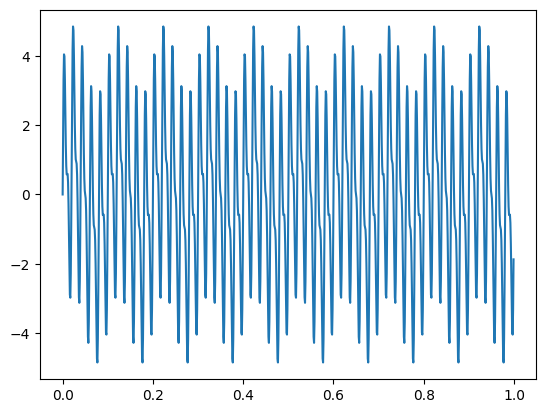

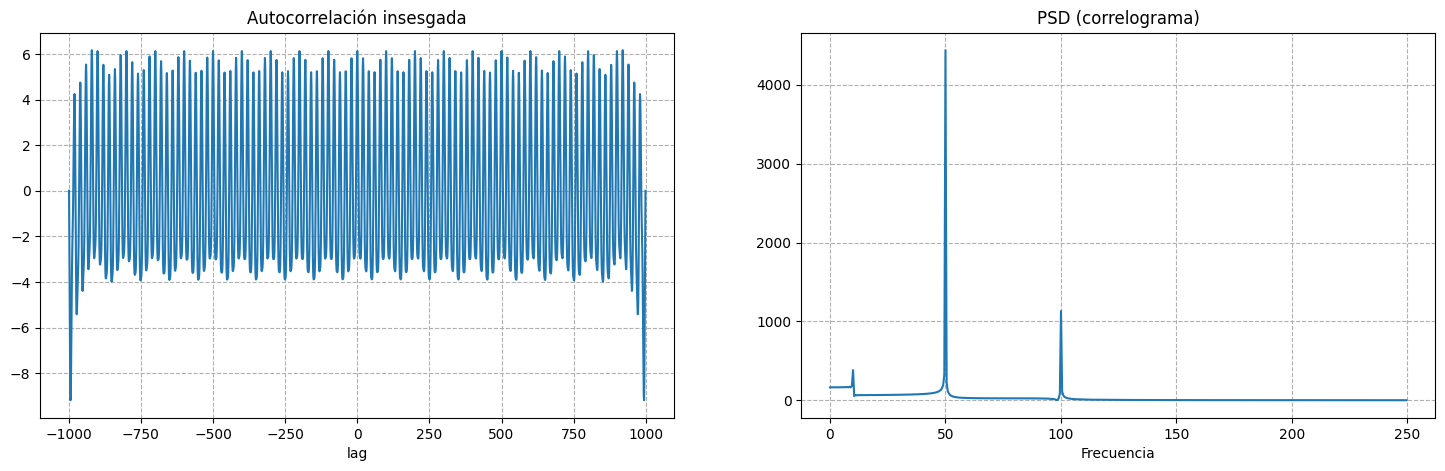

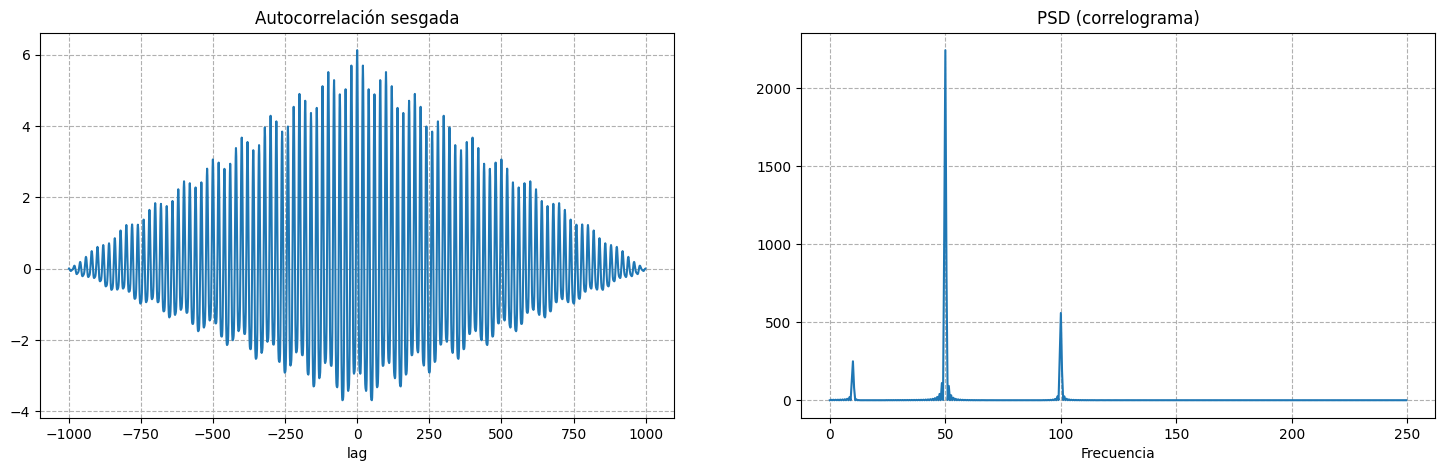

In [ ]:
# Estudio PSD de señales de variación mas lenta
# Funsión para calcular senos

def seno (t,f):
  y=np.sin(2*np.pi*f*t)
  return y

# Parametros
t0=0
tn=1.0
n=1000
ts=(tn-t0)/n
f1=10
f2=50
f3=100
t=np.arange(0,tn,ts)
m=len(t)
# Iniciación de señales
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)
sig3=np.zeros(m,dtype=float)
# Armado de las señales
for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=3*seno(t[i],f2)
  sig3[i]=1.5*seno(t[i],f3)

st1=sig1+sig2+sig3 # señal
l=np.arange(-len(st1)+1,len(st1))
rss=np.convolve(st1,st1[::-1])
N=len(st1)
Rss1=np.ndarray(shape=(len(l),), dtype=float)
for i in l:
  Rss1[i]=rss[i]/(N-np.abs(l[i])) # Autocorrelción insesgada

Sss1=fft(Rss1) #TF autocorrelación
w1=fftfreq(len(Sss1))*N
# Graficos
plt.plot(t,st1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(l,Rss1)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación insesgada")
ax1.set_xlabel("lag")
ax2.plot(w1[0:500],np.abs(Sss1[0:500]))
ax2.grid()
ax2.grid(linestyle='--')
ax2.set_title("PSD (correlograma)")
ax2.set_xlabel("Frecuencia")
print('Media y Varianza inses',np.mean(np.abs(Sss1)), np.var(np.abs(Sss1)))
Rss2=rss/(N)  # Autocorrelación sesgada
Sss2=fft(Rss2) #TF autocorrelación
w2=fftfreq(len(Sss2))*N
# Gráficos
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(l,Rss2)
ax3.grid(linestyle='--')
ax3.set_title("Autocorrelación sesgada")
ax3.set_xlabel("lag")
ax4.plot(w2[0:500],np.abs(Sss2[0:500]))
ax4.grid()
ax4.grid(linestyle='--')
ax4.set_title("PSD (correlograma)")
ax4.set_xlabel("Frecuencia")
print('Media y Varianza ses', np.mean(np.abs(Sss2)), np.var(np.abs(Sss2)))

### Señales con ruido

Media y Varianza inses 21.609249317306887 21182.19277892685
Media y Varianza ses 7.110146726327546 6987.94095172284


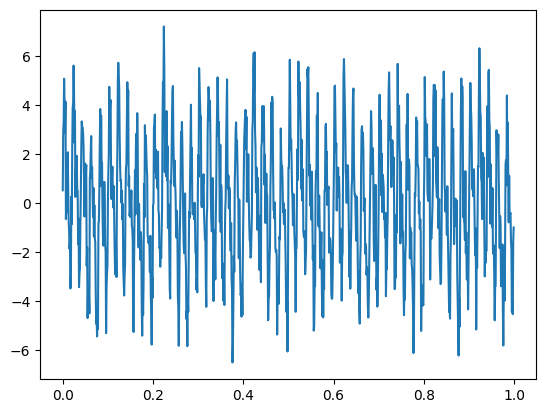

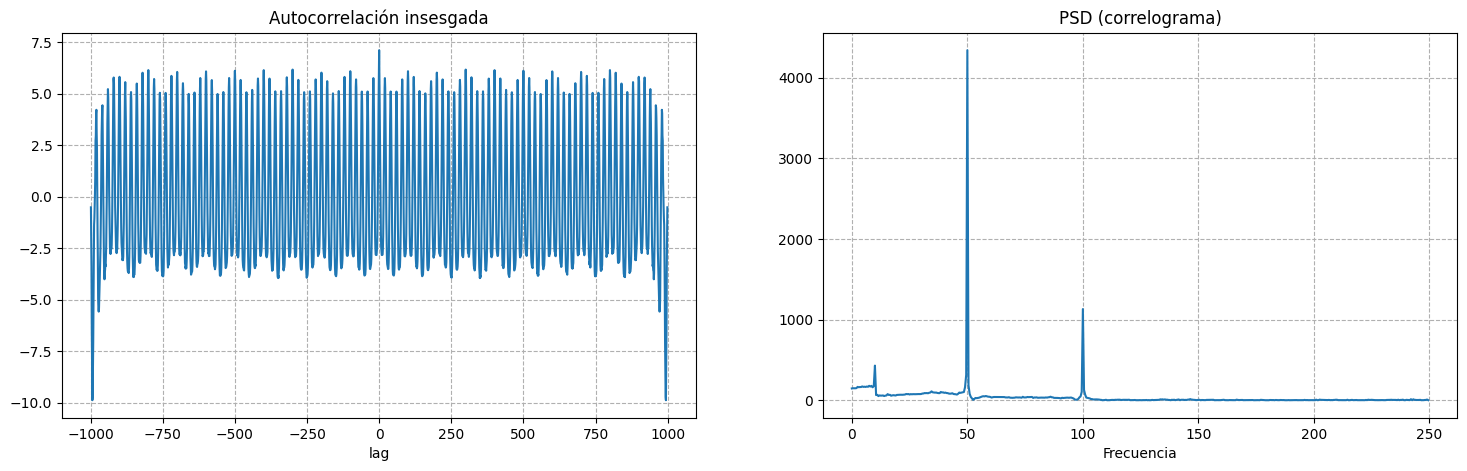

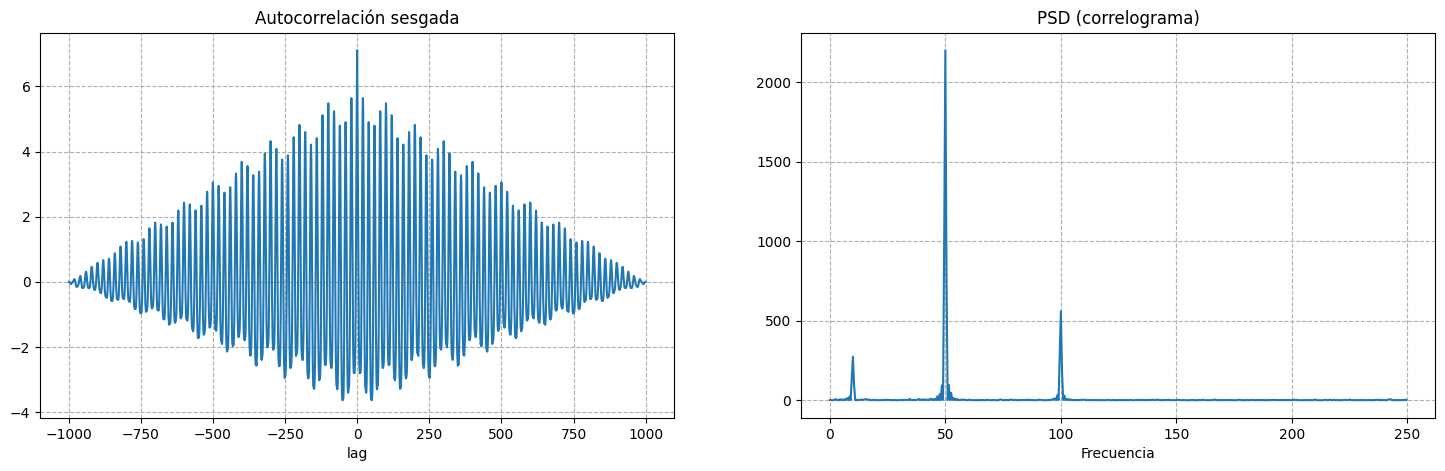

In [ ]:
st2=sig1+sig2+sig3+noise # señal
l2=np.arange(-len(st2)+1,len(st2))
rss=np.convolve(st2,st2[::-1])
N=len(st2)

Rss3=np.ndarray(shape=(len(l),), dtype=float)
for i in l:
  Rss3[i]=rss[i]/(N-np.abs(l2[i])) # Autocorrelción insesgada

Sss3=fft(Rss3) #TF autocorrelación
w3=fftfreq(len(Sss3))*N
# Graficos
plt.plot(t,st2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(l2,Rss3)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación insesgada")
ax1.set_xlabel("lag")
ax2.plot(w3[0:500],np.abs(Sss3[0:500]))
ax2.grid()
ax2.grid(linestyle='--')
ax2.set_title("PSD (correlograma)")
ax2.set_xlabel("Frecuencia")
print('Media y Varianza inses',np.mean(np.abs(Sss3)), np.var(np.abs(Sss3)))
Rss4=rss/(N)  # Autocorrelación sesgada
Sss4=fft(Rss4) #TF autocorrelación
w4=fftfreq(len(Sss4))*N
# Gráficos
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(l2,Rss4)
ax3.grid(linestyle='--')
ax3.set_title("Autocorrelación sesgada")
ax3.set_xlabel("lag")
ax4.plot(w4[0:500],np.abs(Sss4[0:500]))
ax4.grid()
ax4.grid(linestyle='--')
ax4.set_title("PSD (correlograma)")
ax4.set_xlabel("Frecuencia")
print('Media y Varianza ses', np.mean(np.abs(Sss4)), np.var(np.abs(Sss4)))

## Estimadores PSD

### Correlograma

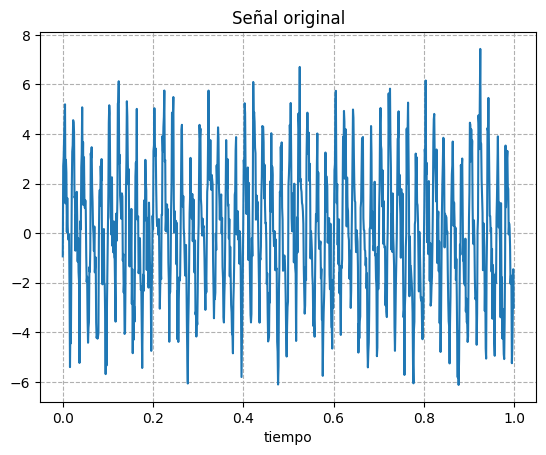

Media y Varianza ses 24.093912747840815 23186.012298479985
Media y Varianza inses 7.089717140663595 7240.449728897746


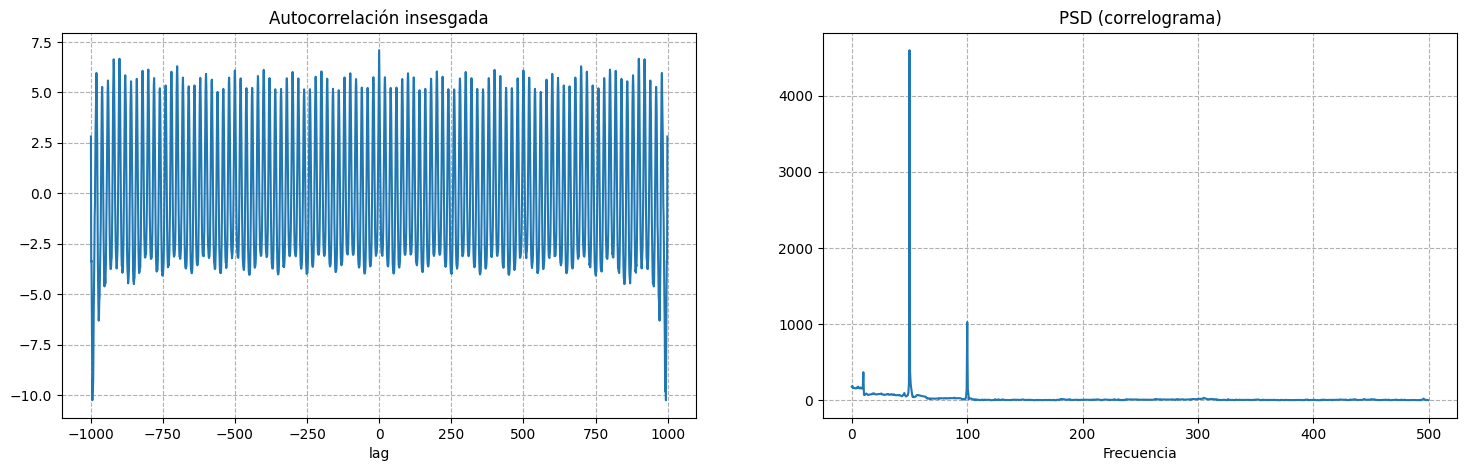

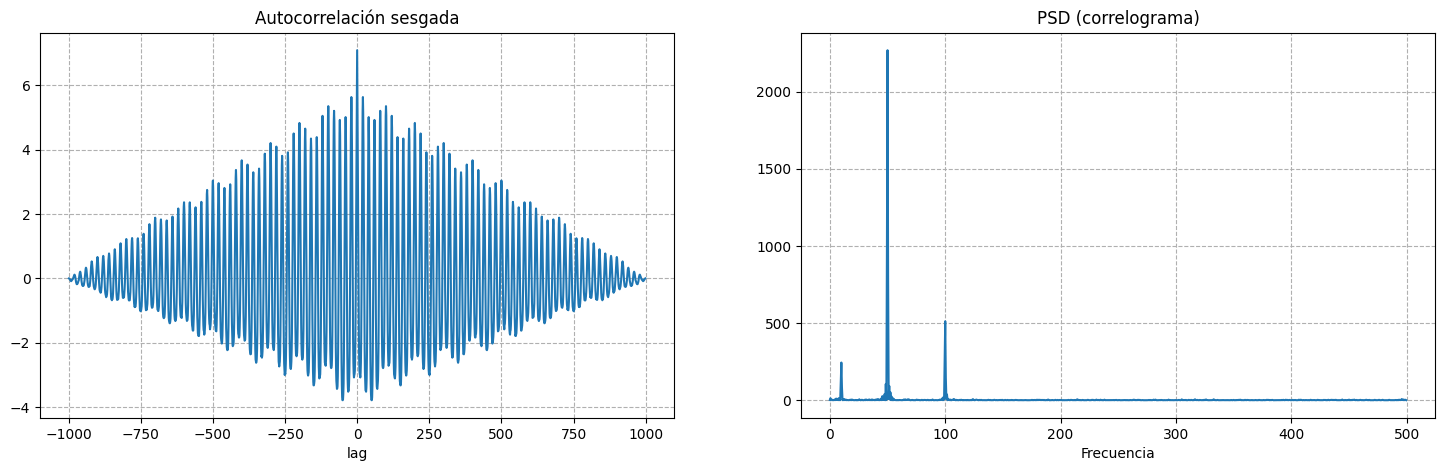

In [ ]:
def seno (t,fs):
  y=np.sin(2*np.pi*fs*t)
  return y

t0=0
tn=1.0
n=1000
ts=(tn-t0)/n
f1=10
f2=50
f3=100
t=np.arange(0,tn,ts)
m=len(t)
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)
sig3=np.zeros(m,dtype=float)
for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=3*seno(t[i],f2)
  sig3[i]=1.5*seno(t[i],f3)
noise=np.random.normal(0,1,n)
st3=sig1+sig2+sig3+noise #señal con ruido
l=np.arange(-len(st3)+1,len(st3))
# Gráfico de la señal
plt.plot(t,st3)
plt.grid(linestyle='--')
plt.title("Señal original")
plt.xlabel("tiempo")
plt.show()
# Procesamiento
rxx=np.convolve(st3,st3[::-1])
Rxx1=np.ndarray(shape=(len(l),), dtype=float)
for i in l:
  Rxx1[i]=rxx[i]/(n-np.abs(l[i])) # Autocorrelción insesgada
Sxx1=fft(Rxx1)
w1=fftfreq(len(Sxx1))*n
# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(l,Rxx1)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación insesgada")
ax1.set_xlabel("lag")
ax2.plot(w1[0:n],np.abs(Sxx1[0:n]))
ax2.grid(linestyle='--')
ax2.set_title("PSD (correlograma)")
ax2.set_xlabel("Frecuencia")
print('Media y Varianza ses',np.mean(np.abs(Sxx1)), np.var(np.abs(Sxx1)))
# Procesamiento
Rxx2=rxx/(n)
Sxx2=fft(Rxx2)
w2=fftfreq(len(Sxx2))*n
# Gráficos
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(l,Rxx2)
ax3.grid(linestyle='--')
ax3.set_title("Autocorrelación sesgada")
ax3.set_xlabel("lag")
ax4.plot(w2[0:n],np.abs(Sxx2[0:n]))
ax4.grid(linestyle='--')
ax4.set_title("PSD (correlograma)")
ax4.set_xlabel("Frecuencia")
print('Media y Varianza inses', np.mean(np.abs(Sxx2)), np.var(np.abs(Sxx2)))


###Periodograma

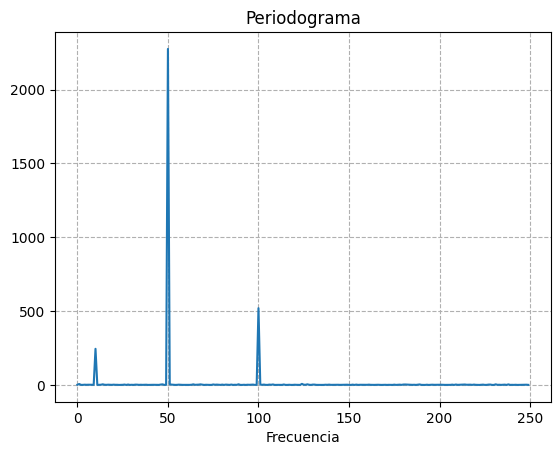

Media y Varianza periodograma 13.199587581000836 21855.50710900096


In [ ]:
#Periodograma
TFst3=fft(st3)
w3=fftfreq(len(TFst3))*1000
plt.plot(w3[0:250],(np.abs(TFst3[0:250]))**2/n)
plt.grid(linestyle='--')
plt.title("Periodograma")
plt.xlabel("Frecuencia")
plt.show()
print('Media y Varianza periodograma', np.mean(np.abs((TFst3[0:250])**2/n)), np.var(np.abs((TFst3[0:250])**2/n)))

###Correlograma y Periodograma

7.267319727051334 3980.462391522692 Correlograma
14.179434281327195 43862.43410302056 Periodograma


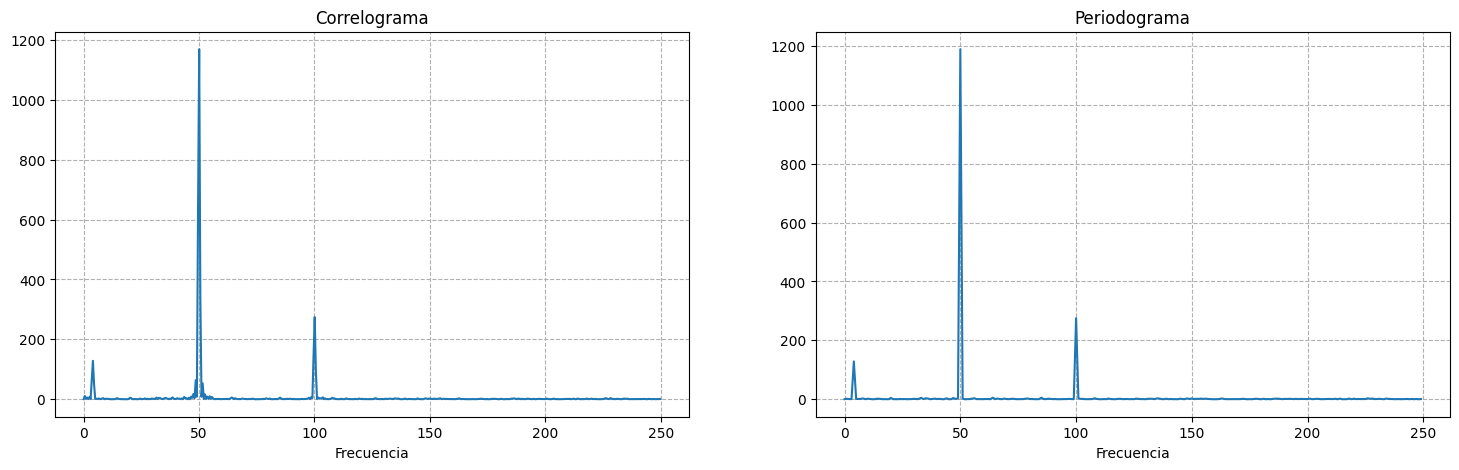

In [ ]:
# Comparación del periodograma vs correlograma
#  construcción de la señal
def seno (t,fs):
  y=np.sin(2*np.pi*fs*t)
  return y

t0=0
tn=1.0
n=500
ts=(tn-t0)/n
f1=4
f2=50
f3=100
t=np.arange(0,tn,ts)
m=len(t)
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)
sig3=np.zeros(m,dtype=float)
for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=3*seno(t[i],f2)
  sig3[i]=1.5*seno(t[i],f3)
noise=np.random.normal(0,1,500)
st4=sig1+sig2+sig3+noise
# Procesamiento
rxx=np.convolve(st4,st4[::-1])
Rxx4=rxx/n
Sxx4=fft(Rxx4)
w4=fftfreq(len(Sxx4))*500
TFst5=fft(st4)
w5=fftfreq(len(TFst5))*500
# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(w4[0:500],np.abs(Sxx4[0:500]))
ax1.grid(linestyle='--')
ax1.set_title("Correlograma")
ax1.set_xlabel("Frecuencia")
ax2.plot(w5[0:250],(np.abs((TFst5[0:250])**2)/n))
ax2.grid(linestyle='--')
ax2.set_title("Periodograma")
ax2.set_xlabel("Frecuencia")
print(np.mean(np.abs(Sxx4)), np.var(np.abs(Sxx4)), 'Correlograma')
print((np.mean((np.abs(TFst3))**2)/n), (np.var((np.abs(TFst3)**2)/n)), 'Periodograma')

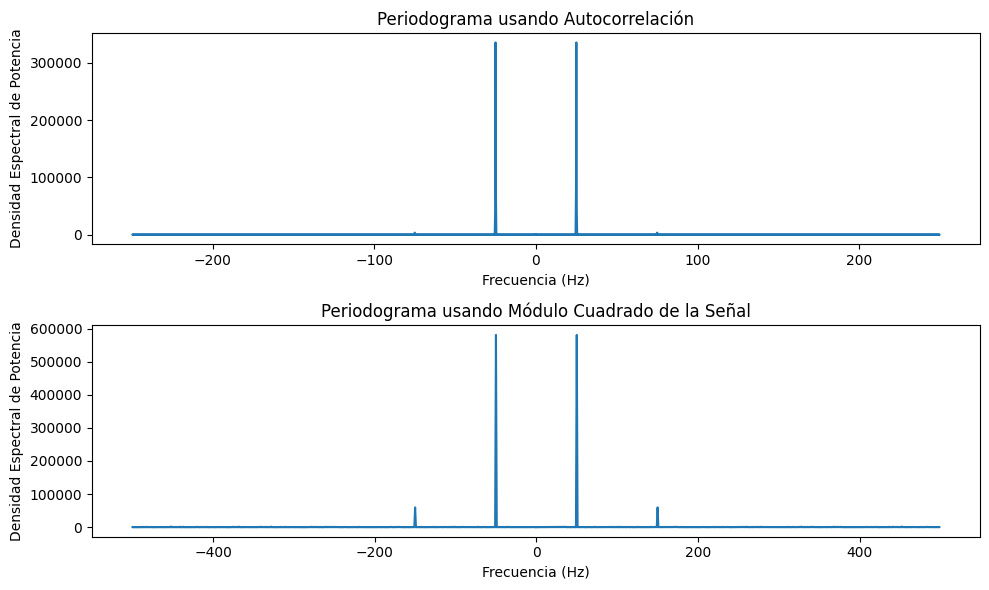

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)
f1 = 50  # Frecuencia de la primera componente
f2 = 150  # Frecuencia de la segunda componente
amplitude1 = 1.5
amplitude2 = 0.5

# Señal compuesta
signal = amplitude1 * np.sin(2 * np.pi * f1 * t) + amplitude2 * np.sin(2 * np.pi * f2 * t)
noise = 0.5 * np.random.randn(len(t))
noisy_signal = signal + noise

# Cálculo del periodograma usando autocorrelación
autocorr = np.correlate(noisy_signal, noisy_signal, mode='full') / len(noisy_signal)
freqs = np.fft.fftfreq(len(autocorr), 1/fs)
periodogram_autocorr = np.abs(np.fft.fft(autocorr))**2

# Cálculo del periodograma usando el módulo cuadrado de la señal
periodogram_squared = np.abs(np.fft.fft(noisy_signal))**2
freqs1 = np.fft.fftfreq(len(periodogram_squared), 1/fs)
# Gráficos
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(freqs/2, periodogram_autocorr)
plt.title('Periodograma usando Autocorrelación')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')

plt.subplot(2, 1, 2)
plt.plot(freqs1, periodogram_squared)
plt.title('Periodograma usando Módulo Cuadrado de la Señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')

plt.tight_layout()
plt.show()

### Periodograma Blackman-Tukey

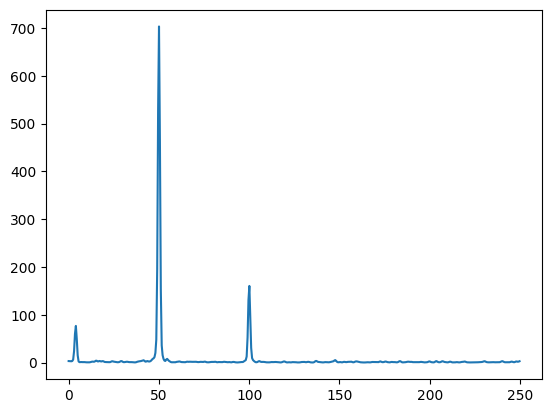

7.0242941184243755 2202.2283264336384 Periodograma


In [ ]:
#  construcción de la señal
def seno (t,fs):
  y=np.sin(2*np.pi*fs*t)
  return y

t0=0
tn=1.0
n=500
ts=(tn-t0)/n
f1=4
f2=50
f3=100
t=np.arange(0,tn,ts)
m=len(t)
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)
sig3=np.zeros(m,dtype=float)
for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=3*seno(t[i],f2)
  sig3[i]=1.5*seno(t[i],f3)
noise=np.random.normal(0,1,500)
st4=sig1+sig2+sig3+noise
# Procesamiento
rxx=np.convolve(st4,st4[::-1])
win=np.blackman(len(rxx))
Rxx4=(win*rxx)/n
Sxx4=fft(Rxx4)
w4=fftfreq(len(Sxx4))*500
#Grafico
plt.plot(w4[0:500],np.abs(Sxx4[0:500]))
plt.show()
print(np.mean((np.abs(Sxx4))), np.var(np.abs(Sxx4)), 'Periodograma')

### Periodograma Barlett

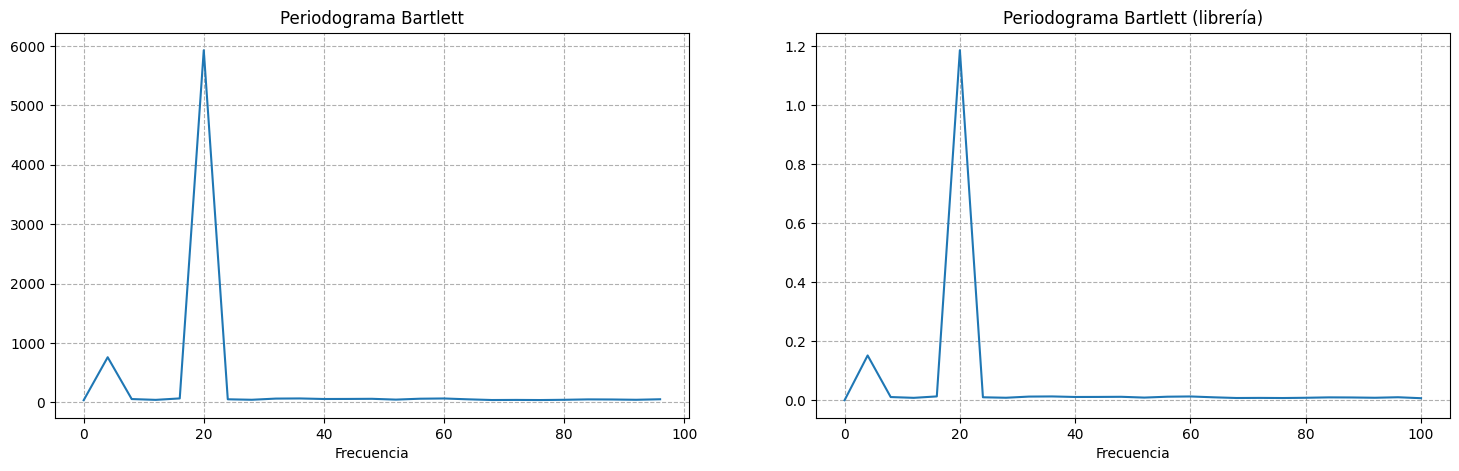

313.80095541094414 1333578.8837346025 Periodograma
0.06021458336707874 0.051450357506899386 Periodograma


In [ ]:
#Modelo Bartlett

def seno (t,fs):
  y=np.sin(2*np.pi*fs*t)
  return y
# Función que ccalcúla periodograma de Bartlet
def bartlett_periodogram(signal, segment_length):
    num_segments = len(signal) // segment_length

    periodogram = np.zeros(segment_length)

    for i in range(num_segments):
        segment = signal[i * segment_length: (i + 1) * segment_length]
        periodogram += np.abs(np.fft.fft(segment))**2

    periodogram /= num_segments
    return periodogram

# Construción de la señal
t0=0
tn=5.0
n=1000
ts=(tn-t0)/n
fs=1/ts
f1=4
f2=20
f3=100
t=np.arange(0,tn,ts)
m=len(t)
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)
sig3=np.zeros(m,dtype=float)
for i in range (0,m):
  sig1[i]=seno(t[i],f1)
  sig2[i]=3*seno(t[i],f2)
  sig3[i]=1.5*seno(t[i],f3)
noise=np.random.normal(0,1,n)
st2=sig1+sig2+noise
# Procesamiento
nfft=nperseg = 50
bartlett = bartlett_periodogram(st2, nperseg) # Función definida
freqs = np.fft.fftfreq(nperseg, 1/fs)
fre2, psd2 = sig.welch(st2, 1/ts, nperseg=nperseg, nfft=nfft, window='boxcar', noverlap=0) # librería
# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(freqs[:nperseg//2],bartlett[:nperseg//2])
ax1.grid(linestyle='--')
ax1.set_title("Periodograma Bartlett")
ax1.set_xlabel("Frecuencia")
ax2.plot(fre2,psd2)
ax2.grid(linestyle='--')
ax2.set_title("Periodograma Bartlett (librería)")
ax2.set_xlabel("Frecuencia")
plt.show()
print(np.mean(bartlett), np.var(bartlett), 'Periodograma')
print(np.mean(psd2), np.var(psd2), 'Periodograma')

### Periodograma Welch

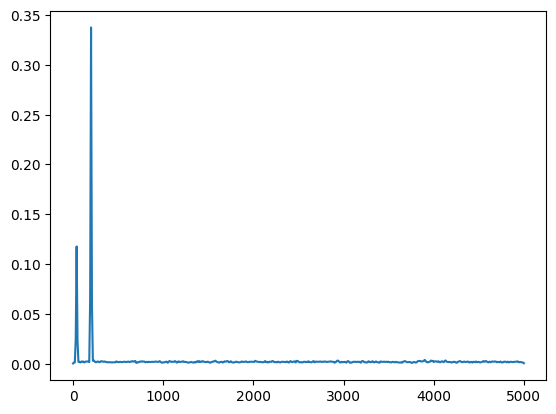

0.0030285687907209277 0.0002672134105552769 Periodograma


In [ ]:
# Modelo de Welch

def seno (t,fs):
  y=np.sin(2*np.pi*fs*t)
  return y

# Construcción de la señal
t0=0
tn=1.0
n=10000
ts=(tn-t0)/n
f1=40
f2=200
f3=50
t=np.arange(0,tn,ts)
m=len(t)
sig1=np.zeros(m,dtype=float)
sig2=np.zeros(m,dtype=float)
sig3=np.zeros(m,dtype=float)
for i in range (0,m):
  sig1[i]=1.75*seno(t[i],f1)
  sig2[i]=3*seno(t[i],f2)
  sig3[i]=1.5*seno(t[i],f3)
noise=np.random.normal(2,3,n)
st2=sig1+sig2+noise
# Procesamiento
nfft = nperseg = 1000
fre2, psd2 = sig.welch(st2, 1/ts, nperseg=nperseg, nfft=nfft, window='hamming', noverlap=nperseg//2) #librería
#Gráfico
plt.plot(fre2[0:1000], psd2[0:1000])
plt.show()
print(np.mean((np.abs(psd2))), np.var(np.abs(psd2)), 'Periodograma')

### **Desafío**

Realice un programa que grafique un periodograma a partir de la técnica de welch sin utilizar la librería correspondiente.
Escriban sus codigos en la linea a continuación

# Wiener Khintchinne

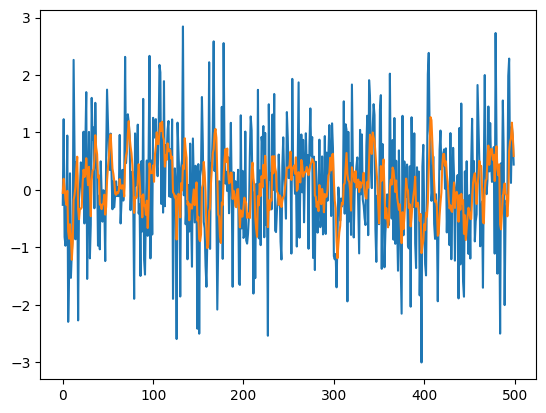

In [ ]:
mean = 0
std = 1
num_noise = 500

noise = np.random.normal(mean, std, size=num_noise)
# Función promedio móvil
def mov_mean(x, N):
    b=np.zeros(N-1)
    a=(np.insert(x, 0, b))
    return (np.convolve(a,np.ones(N),'valid'))/N

lti=mov_mean(noise,5)
plt.plot(noise)
plt.plot(lti)

Media señal original 0.05740380217693307
Media señal filtrada 0.05466130810461782


Text(0.5, 0, 'Frecuencia')

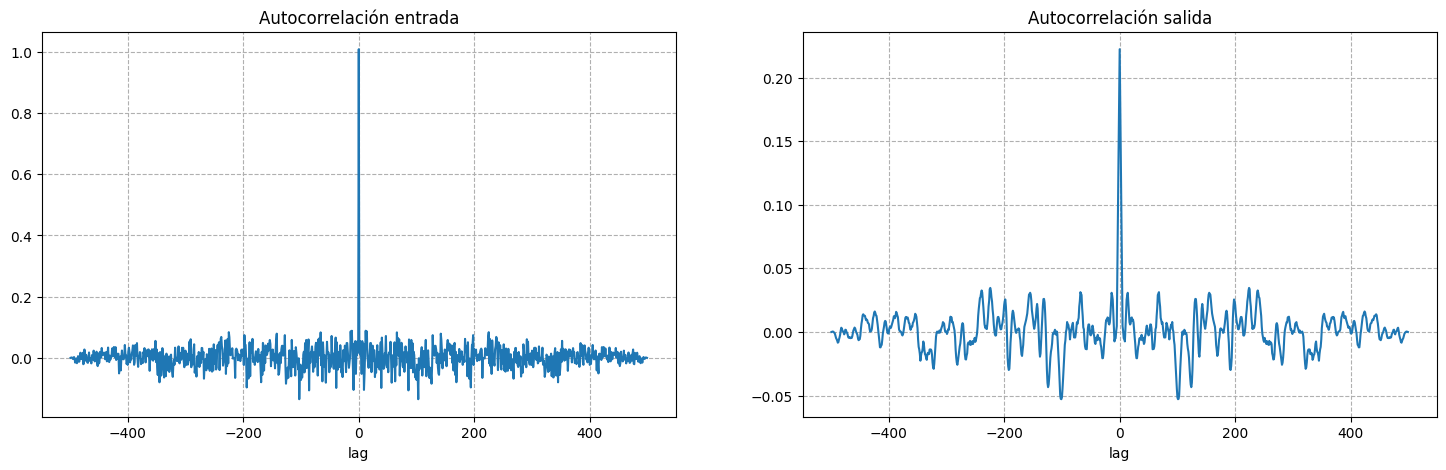

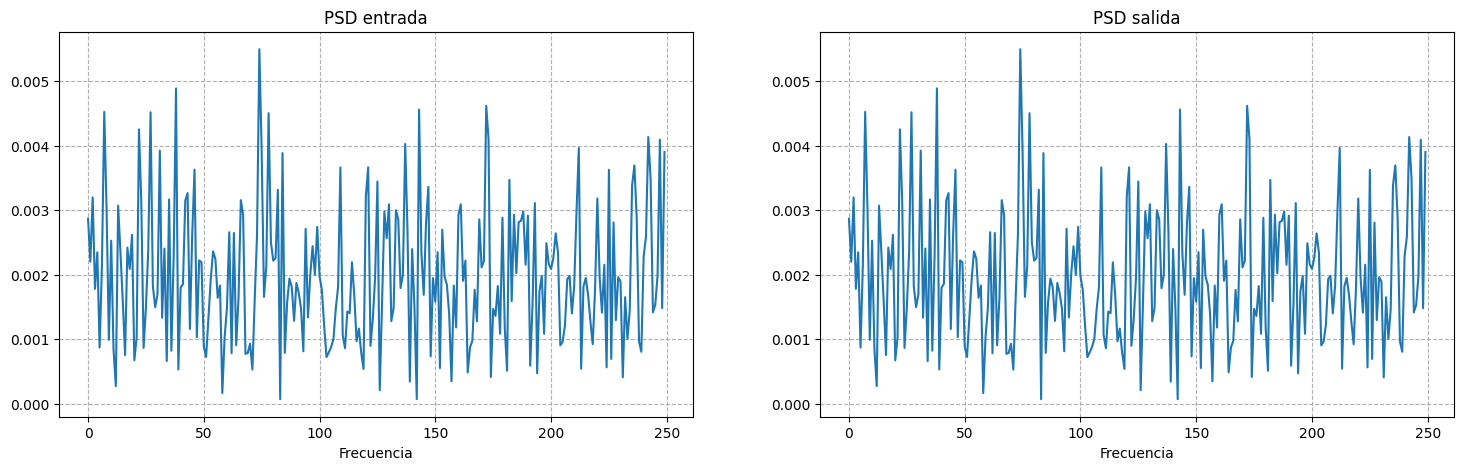

In [ ]:
print('Media señal original',np.mean(noise))
print('Media señal filtrada',np.mean(lti))
# Procesamiento señal de entrada
l=np.arange(-len(noise)+1,len(noise))
rnn=np.convolve(noise,noise[::-1])
N=len(noise)
Rnn=rnn/N
# Procesamiento señal de salida
L=np.arange(-len(lti)+1,len(lti))
rNN=np.convolve(lti,lti[::-1])
#N=len(lti)
RNN=rNN/N
TFst1=fft(noise)
w1=fftfreq(len(TFst1))*500
TFST1=fft(lti)
W1=fftfreq(len(TFST1))*500
# Gráficos señal de entrada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.plot(l,Rnn)
ax1.grid(linestyle='--')
ax1.set_title("Autocorrelación entrada")
ax1.set_xlabel("lag")
ax2.plot(L,RNN)
ax2.grid(linestyle='--')
ax2.set_title("Autocorrelación salida")
ax2.set_xlabel("lag")
#Graficos señal salida
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 5))
ax3.plot(w1[0:250],(np.abs(TFst1[0:250])/n))
ax3.grid(linestyle='--')
ax3.set_title("PSD entrada")
ax3.set_xlabel("Frecuencia")
ax4.plot(w1[0:250],(np.abs(TFst1[0:250])/n))
ax4.grid(linestyle='--')
ax4.set_title("PSD salida")
ax4.set_xlabel("Frecuencia")